<a href="https://colab.research.google.com/github/Elakkiyasivadevan/Machine-Learning-Tasks/blob/main/LAB/ML_KmeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Example

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as mp

In [8]:
data=pd.read_csv('Amazon.com cluster model.csv')

In [10]:
x=data.iloc[:,[2,4]].values

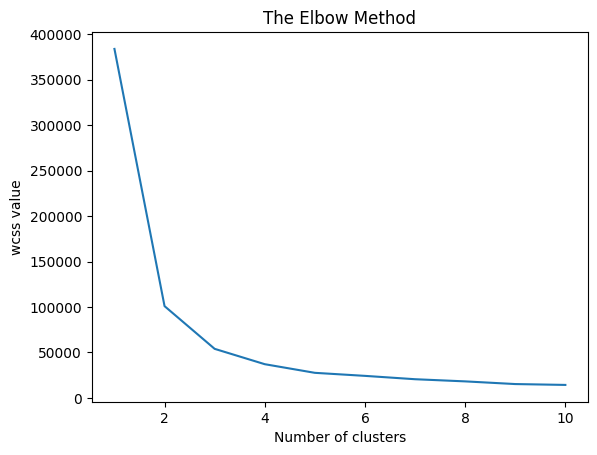

In [11]:
wcss=[]
for i in range(1,11):
  model=KMeans(n_clusters=i,init='k-means++',random_state=42)
  model.fit(x)
  wcss.append(model.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss value')
plt.show()

In [12]:
model= KMeans(n_clusters=4,init='k-means++',random_state=42)
y_means=model.fit_predict(x)
print("y_means:\n\n",y_means)

y_means:

 [3 1 0 0 1 0 1 3 1 2 3 2 0 2 0 0 3 3 2 0 0 0 2 1 2 0 0 3 3 2 2 1 2 2 3 3 3
 2 1 3 0 0 3 2 2 2 2 3 2 2 2 0 0 2 2 1 2 0 0 1 1 3 0 0 0 3 3 1 2 2 2 1 2 1
 3 0 3 1 0 3 1 0 2 3 1 0 0 2 2 3 0 1 0 3 2 1 0 1 1 3 0 3 2 2 3 1 2 3 2 1 0
 1 3 2 0 2 0 1 1 1 1 0 2 2 3 1 3 0 2 1 2 2 0 2 2 1 0 2 1 0 0 1 2 2 1 0 1 2
 2 3 1 0 1 0 2 2 1 3 0 0 1 2 2 1 2 0 1 0 2 2 2 1 2 1 0 0 3 0 0 3 3 1 3 1 2
 3 0 2 1 2 1 3 0 1 0 2 3 1 2 3 2 3]


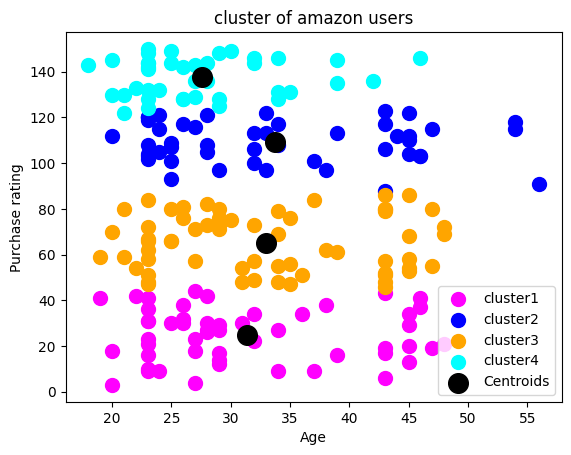

In [13]:
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=100,c='magenta',label='cluster1')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=100,c='blue',label='cluster2')
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=100,c='orange',label='cluster3')
plt.scatter(x[y_means==3,0],x[y_means==3,1],s=100,c='cyan',label='cluster4')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=200,c='black',label='Centroids')
plt.title('cluster of amazon users')
plt.xlabel('Age')
plt.ylabel('Purchase rating')
plt.legend()
plt.show()

1. Implement K-means clustering technique on Geyser's Eruptions Segmentation and segregate waiting time between eruptions and the duration of the eruption for the Old Faithful geyser in the Yellowstone National Park, Wyoming, USA

   index  eruptions  waiting
0      1      3.600       79
1      2      1.800       54
2      3      3.333       74
3      4      2.283       62
4      5      4.533       85
            index   eruptions     waiting
count  272.000000  272.000000  272.000000
mean   136.500000    3.487783   70.897059
std     78.663842    1.141371   13.594974
min      1.000000    1.600000   43.000000
25%     68.750000    2.162750   58.000000
50%    136.500000    4.000000   76.000000
75%    204.250000    4.454250   82.000000
max    272.000000    5.100000   96.000000
Centroids (duration, waiting) in original scale:
  Cluster 0: duration ≈ 4.30, waiting ≈ 80.08
  Cluster 1: duration ≈ 2.05, waiting ≈ 54.59


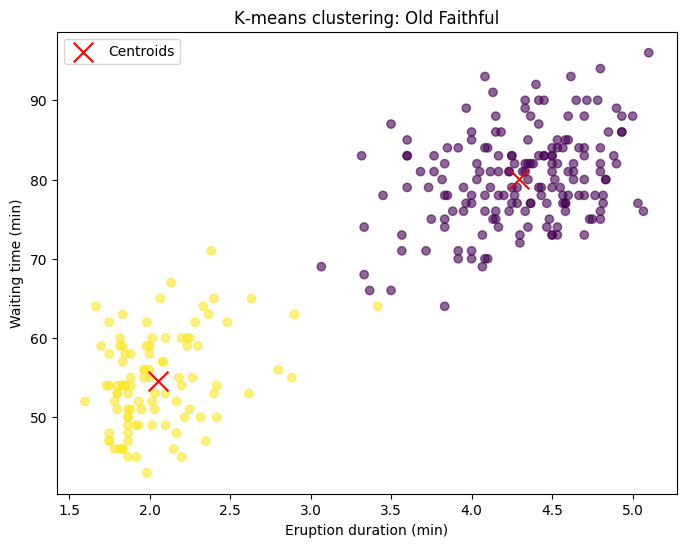

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

url = "https://gist.githubusercontent.com/hogwild/c2704a1ae38c0a36983bc13121050dac/raw/oldFaithfulGeyserDataset.csv"

df = pd.read_csv(url)

print(df.head())
print(df.describe())

X = df[['eruptions', 'waiting']].copy().values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)

print("Centroids (duration, waiting) in original scale:")
for idx, (dur, wait) in enumerate(centroids):
    print(f"  Cluster {idx}: duration ≈ {dur:.2f}, waiting ≈ {wait:.2f}")

plt.figure(figsize=(8,6))
plt.scatter(df['eruptions'], df['waiting'], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='x', s=200, label='Centroids')
plt.xlabel('Eruption duration (min)')
plt.ylabel('Waiting time (min)')
plt.title('K‑means clustering: Old Faithful')
plt.legend()
plt.show()


In [ ]:
2. Using K-Means clustering compress any image of size 396x396x3

Image shape: (396, 396, 3)


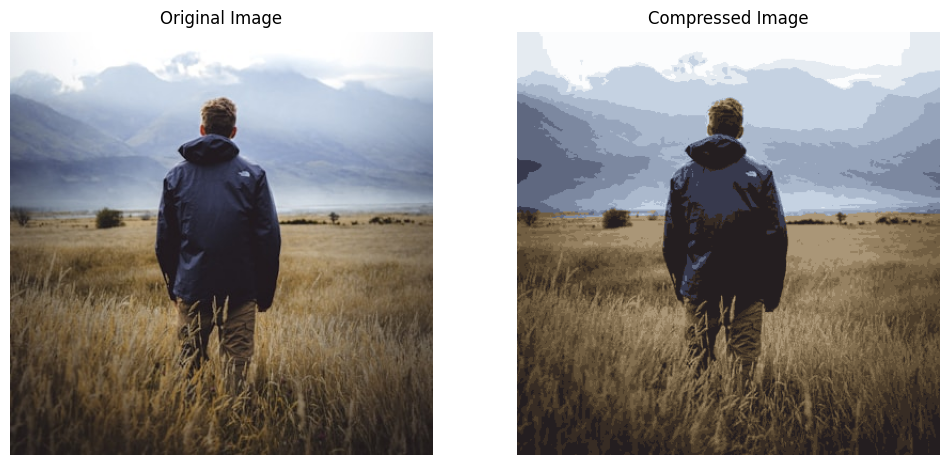

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

img = cv2.imread('image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print("Image shape:", img.shape)

pixel_vals = img.reshape((-1, 3))
pixel_vals = np.float32(pixel_vals)

k = 16
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixel_vals)

centers = np.uint8(kmeans.cluster_centers_)
labels = kmeans.labels_
compressed_img = centers[labels.flatten()]

compressed_img = compressed_img.reshape(img.shape)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img)
plt.axis('off')

plt.subplot(1,2,2)
plt.title(f"Compressed Image")
plt.imshow(compressed_img)
plt.axis('off')

plt.show()
